Лабораторная работа 1
Елизаров Олег

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('archive/full_grouped.csv')
data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [4]:
data.shape

(35156, 10)

In [5]:
data.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [75]:
data.dtypes
types = []
for col in data:
    if data[col].dtype== "int64":
        types.append(col)

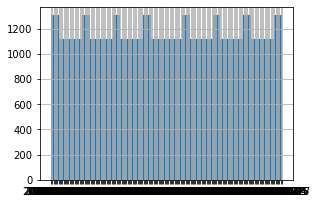

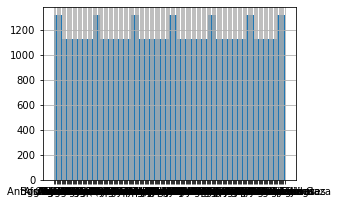

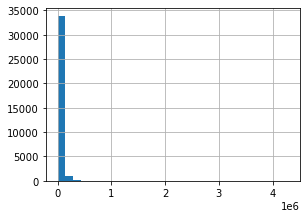

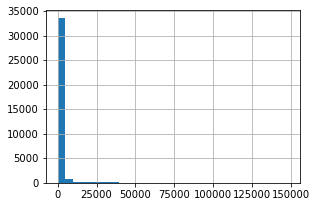

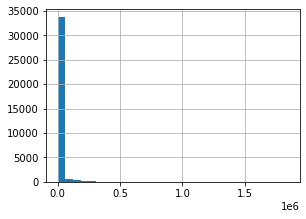

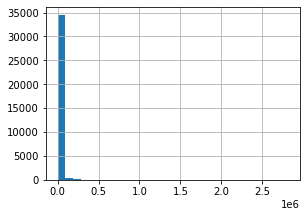

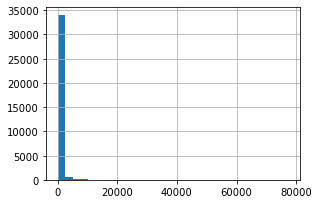

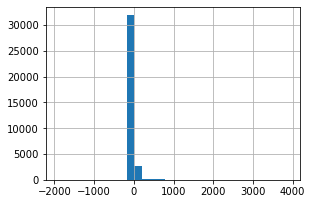

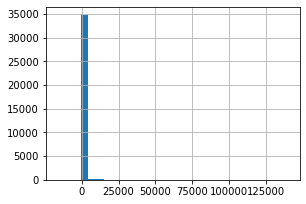

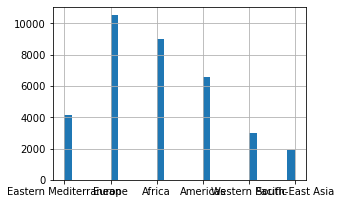

In [8]:
# возьмем часть кода из лекции
def diagnostic_plots(data,col):
    # stars.hist(bins=30)
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    data[col].hist(bins=30)
for col in data:
    diagnostic_plots(data,col)    

In [11]:
for col in data:
    print(col,len(data[col].unique()))
    
# Видим, что было оишбкой делатб гистограммы для всех колонок    

Date 188
Country/Region 187
Confirmed 10732
Deaths 3598
Recovered 7649
Active 8440
New cases 2800
New deaths 715
New recovered 2276
WHO Region 6


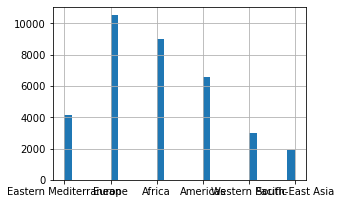

In [12]:
 diagnostic_plots(data,"WHO Region")    # 1

Давайте теперь возьмем суммарные и средние заболевания по странам и регионам

In [16]:
data.groupby("WHO Region").mean().sort_values(by="Confirmed")

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Africa,2414.874446,48.756427,1240.439938,1125.678081,80.179521,1.354499,48.830341
Western Pacific,8768.088763,309.983378,6270.595080,2187.510306,97.034242,2.736702,68.730718
Eastern Mediterranean,17911.724371,465.190764,11617.674807,5828.858801,360.457930,9.269584,290.473888
Europe,23639.797967,1830.455927,11702.324753,10107.017287,315.057751,20.055471,189.373385
South-East Asia,29318.279255,775.603191,15973.578191,12569.097872,976.221277,21.994149,615.389894
Americas,61133.920061,2942.141641,23870.736170,34321.042249,1343.838146,52.086930,679.120973


In [17]:
data.groupby("WHO Region").sum().sort_values(by="Confirmed")

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Africa,21791827,439978,11193730,10158119,723540,12223,440645
Western Pacific,26374411,932430,18861950,6580031,291879,8232,206742
South-East Asia,55118365,1458134,30030327,23629904,1835296,41349,1156933
Eastern Mediterranean,74082892,1924029,48050703,24108160,1490854,38339,1201400
Europe,248879793,19271040,123202075,106406678,3316928,211144,1993723
Americas,402261194,19359292,157069444,225832458,8842455,342732,4468616


In [18]:
data.groupby("Country/Region").mean().sort_values(by="Confirmed")

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Western Sahara,4.792553e+00,0.335106,3.446809,1.010638,0.053191,0.005319,0.042553
Papua New Guinea,6.303191e+00,0.010638,3.696809,2.595745,0.329787,0.000000,0.058511
Holy See,7.212766e+00,0.000000,3.946809,3.265957,0.063830,0.000000,0.063830
Greenland,8.015957e+00,0.000000,7.297872,0.718085,0.074468,0.000000,0.069149
Saint Kitts and Nevis,9.425532e+00,0.000000,6.888298,2.537234,0.090426,0.000000,0.079787
...,...,...,...,...,...,...,...
Spain,1.457662e+05,16133.138298,80285.015957,49348.042553,1504.398936,151.234043,799.872340
India,2.174652e+05,5913.994681,126509.148936,85042.090426,7872.728723,177.702128,5059.393617
Russia,2.415341e+05,3294.601064,133619.404255,104620.095745,4344.042553,70.925532,3203.452128


In [19]:
data.groupby("Country/Region").sum().sort_values(by="Confirmed")

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Western Sahara,901,63,648,190,10,1,8
Papua New Guinea,1185,2,695,488,62,0,11
Holy See,1356,0,742,614,12,0,12
Greenland,1507,0,1372,135,14,0,13
Saint Kitts and Nevis,1772,0,1295,477,17,0,15
...,...,...,...,...,...,...,...
Spain,27404045,3033030,15093583,9277432,282827,28432,150376
India,40883464,1111831,23783720,15987913,1480073,33408,951166
Russia,45408411,619385,25120448,19668578,816680,13334,602249


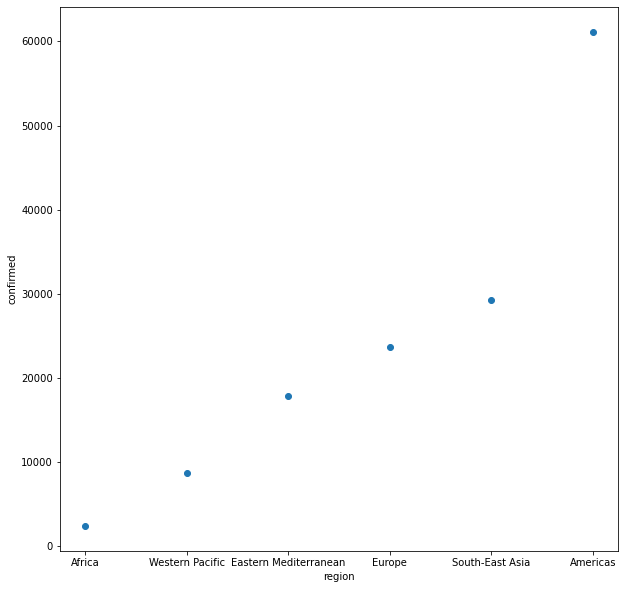

In [61]:
graphData = data.groupby("WHO Region").mean().sort_values(by="Confirmed")
plt.xlabel('region')
plt.ylabel('confirmed')
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x=graphData.index, y=graphData["Confirmed"]) #2

Тут можно увидеть регионы-лидеры по подтвержденным случаям ковида. Конечно, США вытягивает свой регион в абсолютного чемпиона

In [38]:
graphData.index

Index(['Africa', 'Western Pacific', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Americas'],
      dtype='object', name='WHO Region')

<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

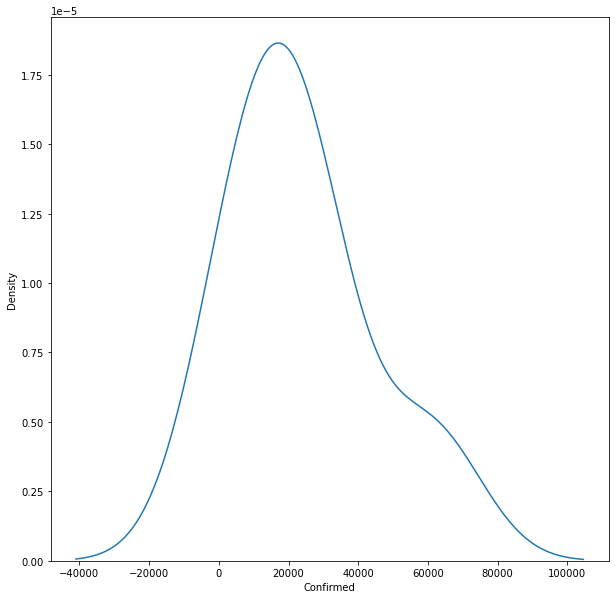

In [82]:
# Make default density plot
sns.kdeplot(graphData['Confirmed']) #3

<AxesSubplot:xlabel='Deaths', ylabel='Density'>

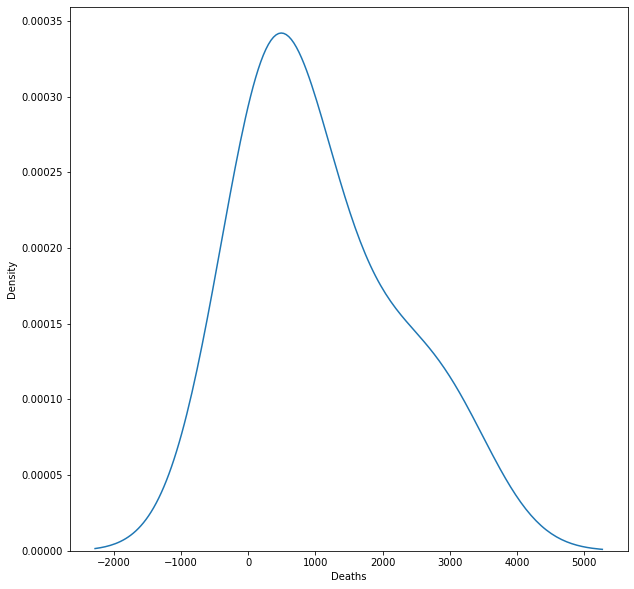

In [83]:
sns.kdeplot(graphData['Deaths'])

Можно ли верить полностью этим графикам ? Я бы был счастлив, если бы в мире было отрицательное число смертей, но ,увы это неточность графика.

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

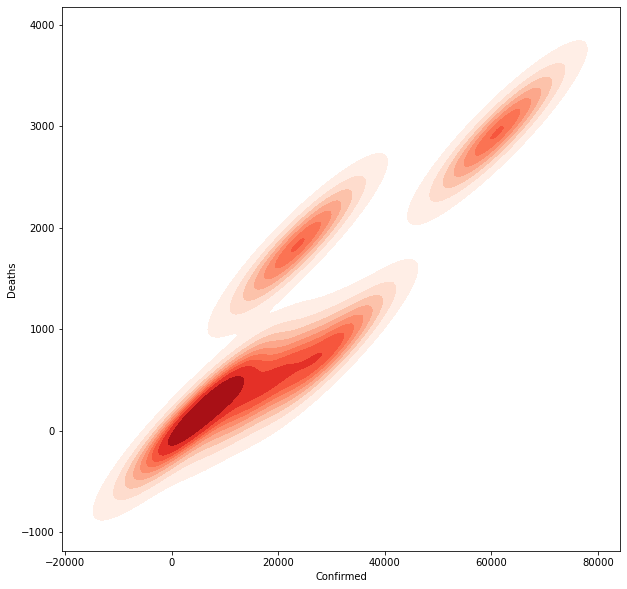

In [87]:
sns.kdeplot(x=graphData["Confirmed"],y=graphData['Deaths'], cmap="Reds", shade=True, bw_adjust=.5) #4

Я бы трактовал этот график так. 
Когда 0 заболеваний, тогда и 0 смертей
При числе заболевших в 20000 - наиболее вероятное число погибших - 2000
При числе заболевших в 60000 - наиболее вероятное число погибших - 3000


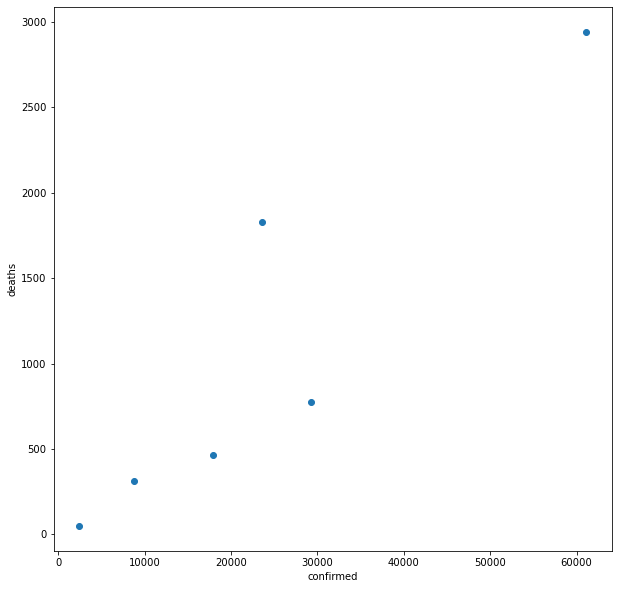

In [91]:
plt.xlabel('confirmed')
plt.ylabel('deaths')
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x=graphData["Confirmed"], y=graphData["Deaths"]) #5

<AxesSubplot:xlabel='WHO Region', ylabel='Confirmed'>

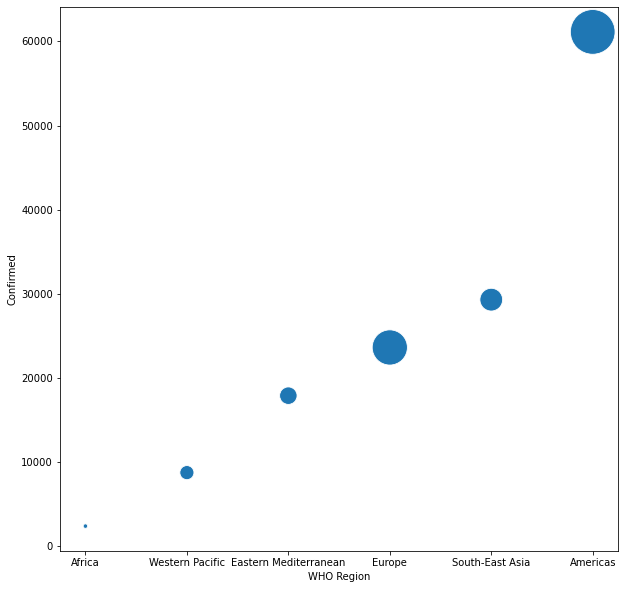

In [93]:
sns.scatterplot(data=graphData, x="WHO Region", y="Confirmed", size="Deaths", legend=False, sizes=(20, 2000)) #6

А тут мы можем увидеть интересную особенность
Конечно, чем меньше заболевших - тем меньше смертность, но есть исключение.
Европа имеет крайне большую смертность в сравнении в Юго-востоком Азии, хотя число заболевших больше.
Причин может быть много,например, можно предположить , что в среднем жители Европы живут в более тепличных условиях,чем в Азии и их иммунитет менее развит. А иммунитет азиатов в состоянии противостоять ковиду, даже если человек заболе, но это лишь гипотеза.

<AxesSubplot:>

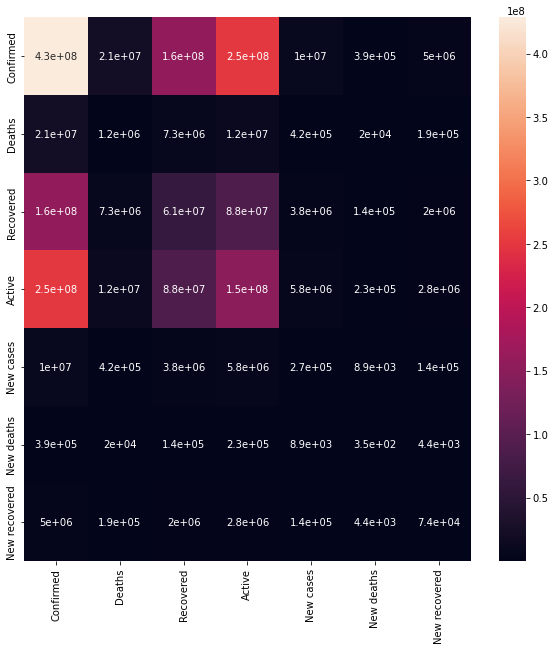

In [107]:
sns.heatmap(graphData.cov(), annot = True)

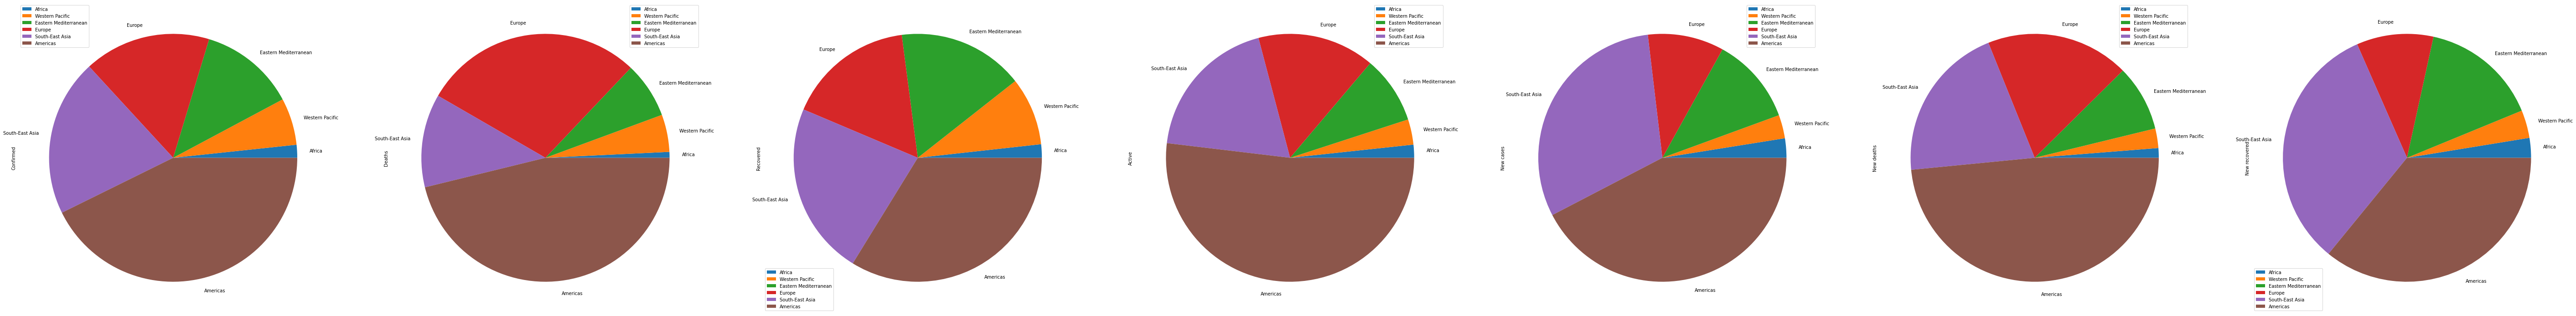

In [132]:
plot = graphData.plot.pie(subplots=True, figsize=(100, 100))

AttributeError: 'numpy.ndarray' object has no attribute 'show'

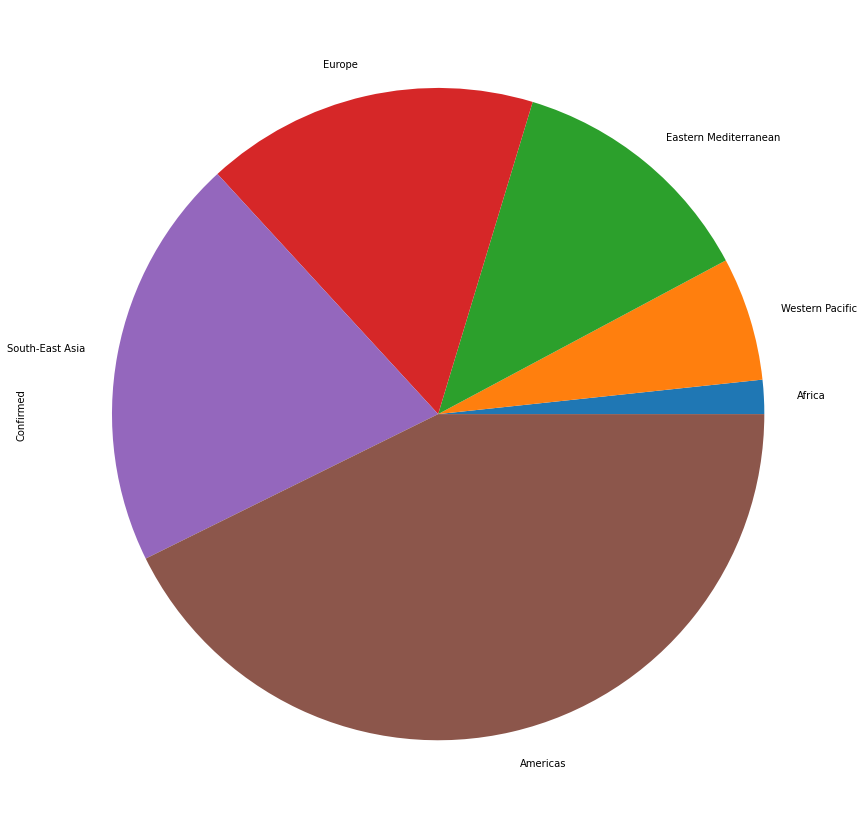

In [146]:
for col in graphData:
    plt = graphData[col].plot.pie(subplots=True, figsize=(15, 15))